# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

a=1 (інтеграл від 0 до π від a*sinx має бути рівний 1)


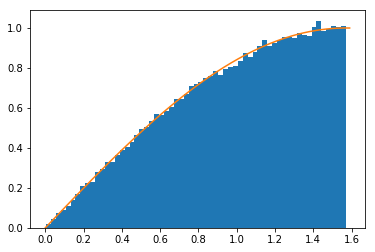

In [4]:
# Місце для Вашого коду
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform
x = np.arange(0, 1.01, 0.01)
a=1
print("a=1 (інтеграл від 0 до π від a*sinx має бути рівний 1)")
x1=-a*np.cos(x)
x2=uniform()
n=100000
y2=x2.rvs(size=n)
z=np.arccos(y2)
x = np.arange(0, 1.6, 0.01)
y1=np.sin(x)

plt.hist(z, density = True, bins = 'auto')
plt.plot(x, y1, label='linear')
plt.show()



### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

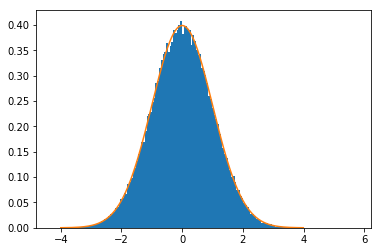

In [22]:
# Місце для Вашого коду
from scipy.stats import norm
x1=norm()
x2=uniform()

y2=x2.rvs(size=n)
y0=x1.ppf(y2)
x = np.arange(-4,4, 0.01)
y1=x1.pdf(x)

plt.hist(y0, density = True, bins = 'auto')
plt.plot(x, y1, label='linear')
plt.show()


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

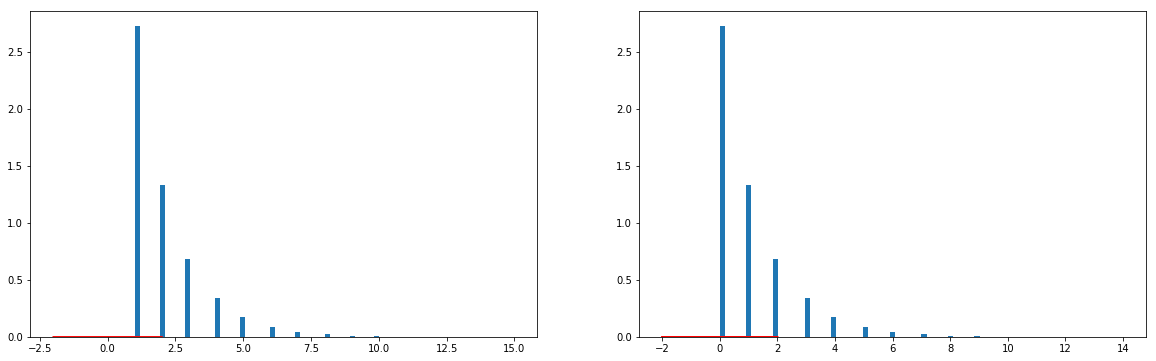

In [14]:
# Місце для Вашого коду
from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt

p=0.5
xi=geom(p)
rvs = xi.rvs(size = 10000)
x = np.arange(-2, 2.01, 0.001)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
y = xi.pmf(x)

axs[0].hist(rvs, density = True, bins = 'auto')
axs[0].plot(x, y, 'r')

f_rvs = (rvs-1)
f_rvs = f_rvs[f_rvs>=0]

axs[1].hist(f_rvs, density = True, bins = 'auto')
axs[1].plot(x, y, 'r')


def f(x):
    return [0 if el < 0 else geom(p).pmf(el) for el in x]
axs[1].plot(x, f(x), 'r')
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

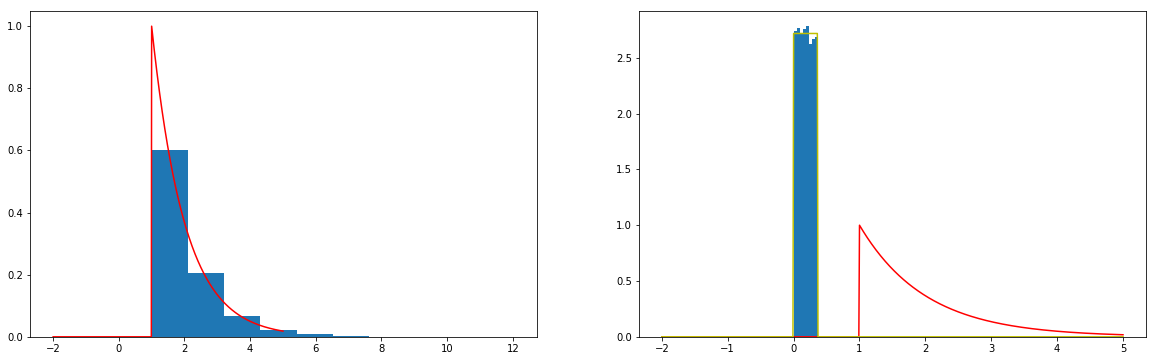

In [31]:
# Місце для Вашого коду
from scipy.stats import expon
xi = expon(1)

rvs = xi.rvs(size = 10000)
x = np.arange(-2, 5.01, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
y = xi.pdf(x)

axs[0].hist(rvs, density = True, bins = 10)
axs[0].plot(x, y, 'r')

f_rvs = np.exp(rvs*(-1))

axs[1].hist(f_rvs, density = True, bins = 8)

axs[1].plot(x, y, 'r')

def f(x):
    return [0 if el <= 0 else xi.pdf(-np.log(el))/el for el in x]
axs[1].plot(x, f(x), 'y')
plt.show()




### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

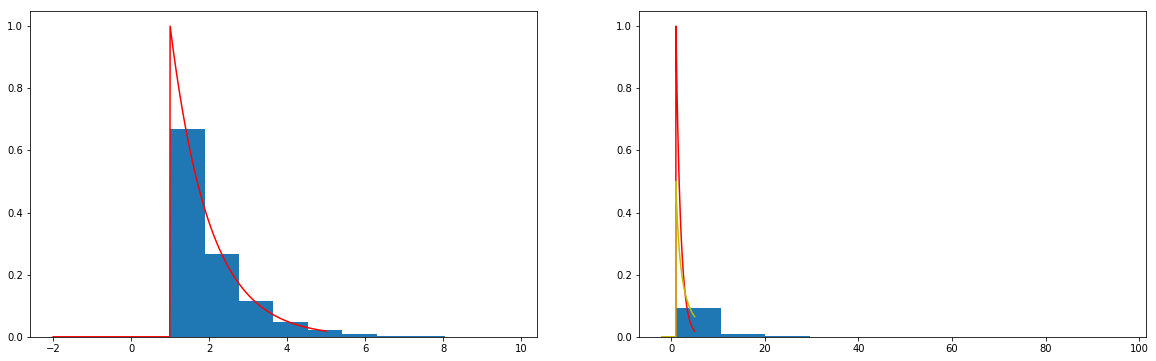

In [35]:
# Місце для Вашого коду
xi = expon(1)

rvs = xi.rvs(size = 10000)
x = np.arange(-2, 5.01, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
y = xi.pdf(x)

axs[0].hist(rvs, density = True, bins = 10)
axs[0].plot(x, y, 'r')

f_rvs = rvs**2

axs[1].hist(f_rvs, density = True, bins = 10)

axs[1].plot(x, y, 'r')

def f(x):
    return [0 if el <= 0 else xi.pdf(np.sqrt(el))/2/np.sqrt(el) for el in x]
axs[1].plot(x, f(x), 'y')
plt.show()


## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

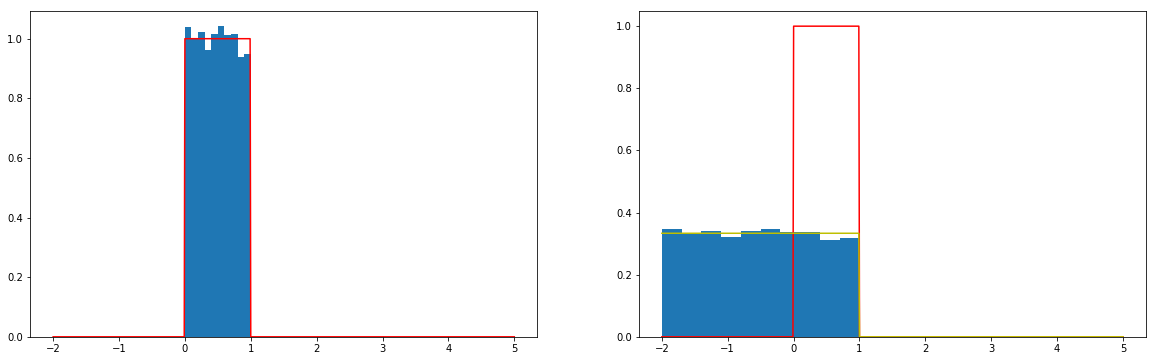

In [50]:
# Місце для Вашого коду
from scipy.stats import uniform
xi = uniform(0,1)

rvs = xi.rvs(size = 10000)
x = np.arange(-2, 5.01, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
y = xi.pdf(x)

axs[0].hist(rvs, density = True, bins = 10)
axs[0].plot(x, y, 'r')
f_rvs = 3*rvs-2

axs[1].hist(f_rvs, density = True, bins = 10)

axs[1].plot(x, y, 'r')

def f(x):
    return [0 if el < -2 else uniform(0,1).pdf((el+2)/3)/3 for el in x]
axs[1].plot(x, f(x), 'y')
plt.show()



### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

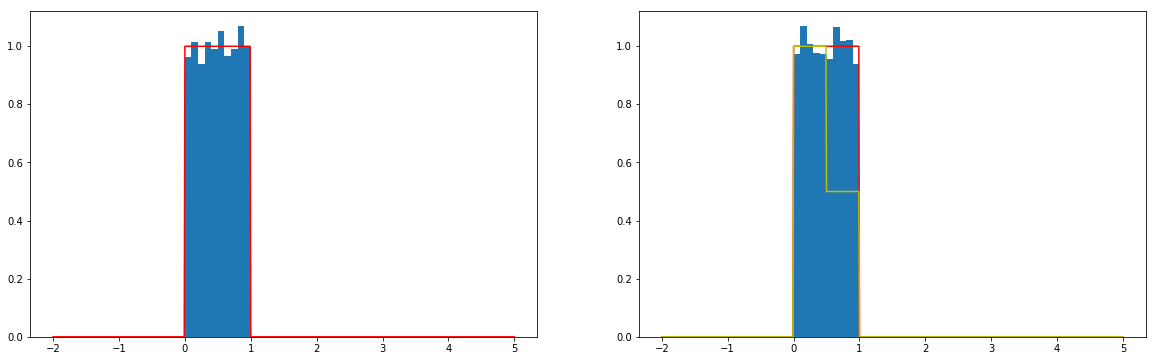

In [78]:
# Місце для Вашого коду
from scipy.stats import uniform
xi = uniform(0,1)

rvs = xi.rvs(size = 10000)
x = np.arange(-2, 5.01, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
y = xi.pdf(x)

axs[0].hist(rvs, density = True, bins = 10)
axs[0].plot(x, y, 'r')
f_rvs =abs(2*rvs-1)

axs[1].hist(f_rvs, density = True, bins = 10)

axs[1].plot(x, y, 'r')
def f(x):
    return [0 if el < 0 else uniform(0,1).pdf((el+1)/2)/2+uniform(0,1).pdf((-el+1)/2)/2 if el < 1/2 else uniform(0,1).pdf((el+1)/2)/2 for el in x]

axs[1].plot(x, f(x), 'y')
plt.show()


### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

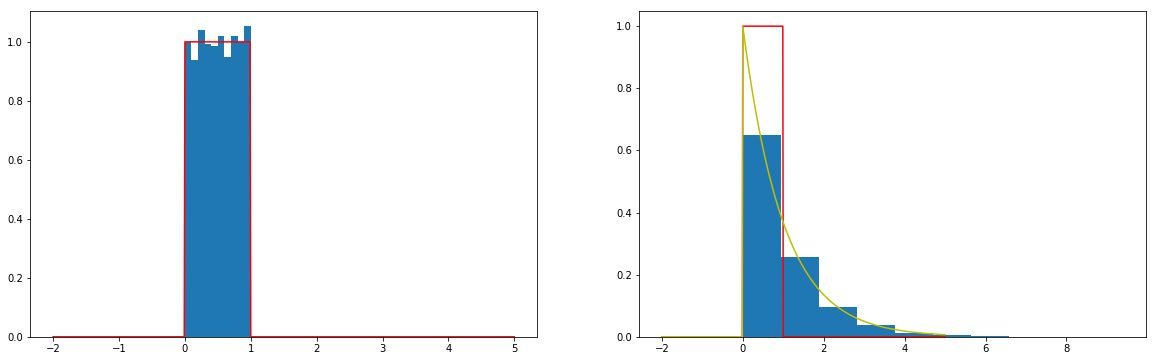

In [79]:
# Місце для Вашого коду
from scipy.stats import uniform
xi = uniform(0,1)

rvs = xi.rvs(size = 10000)
x = np.arange(-2, 5.01, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
y = xi.pdf(x)

axs[0].hist(rvs, density = True, bins = 10)
axs[0].plot(x, y, 'r')
f_rvs =-np.log(rvs)

axs[1].hist(f_rvs, density = True, bins = 10)

axs[1].plot(x, y, 'r')
def f(x):
    return [uniform(0,1).pdf(np.exp(-el))*np.exp(-el) for el in x]

axs[1].plot(x, f(x), 'y')
plt.show()



## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

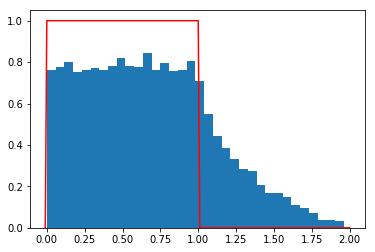

In [82]:
# Місце для Вашого коду
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

xi = uniform()
eta = uniform()

xi_rvs = xi.rvs(size = 10000)
eta_rvs =eta.rvs(size = 10000)

fig, axs = plt.subplots(1, 1)

x = np.arange(-0.01, 2.01, 0.01)
y = xi.pdf(x)

f_rvs = xi_rvs**2+eta_rvs**2

axs.hist(f_rvs, density = True, bins = 'auto')
axs.plot(x, y, 'r')

#axs.plot(x, f(x), 'r')
plt.show()



Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

In [12]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

In [13]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

In [14]:
# Місце для Вашого коду

